In [1]:
import fastai

In [2]:
from fastai.vision import *

In [3]:


#path = '/opt/AIStorage/PLAYGROUND/data/'
path = '/opt/AIStorage/PLAYGROUND/images/1024/'


data = ImageDataBunch.from_folder(path,valid='validation', size=512, bs=32, ds_tfms=(rand_pad(2, 512), []))


epochs=25
arch = models.densenet121
#arch = models.resnet34

    
    

In [4]:
learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True).to_fp16()
#learn = cnn_learner(data, arch, metrics=accuracy, bn_final=True)
#learn = cnn_learner(data, arch, metrics=accuracy, opt_func=optim.SGD)

In [5]:
learn.model = nn.DataParallel(learn.model)
learn.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,accuracy,time
0,0.592895,0.555348,0.719690,01:52
1,0.524035,0.527768,0.741513,01:45
2,0.492644,0.497129,0.760427,01:46
3,0.461754,0.445462,0.791465,01:47
4,0.424668,0.426935,0.805044,01:47
5,0.362251,0.382845,0.832202,01:46
6,0.340068,0.371195,0.844326,01:46
7,0.303316,0.361670,0.845781,01:47
8,0.274556,0.363511,0.851115,01:47
9,0.224551,0.399017,0.839961,01:46


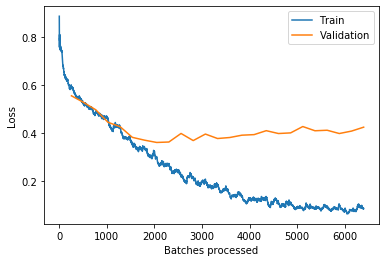

In [6]:
learn.recorder.plot_losses()

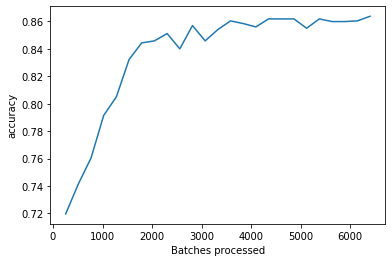

In [7]:
learn.recorder.plot_metrics()

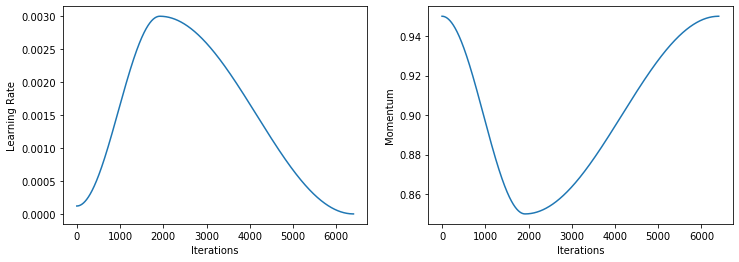

In [8]:
learn.recorder.plot_lr(show_moms=True)

In [9]:
learn.opt_func

functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99))

In [10]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

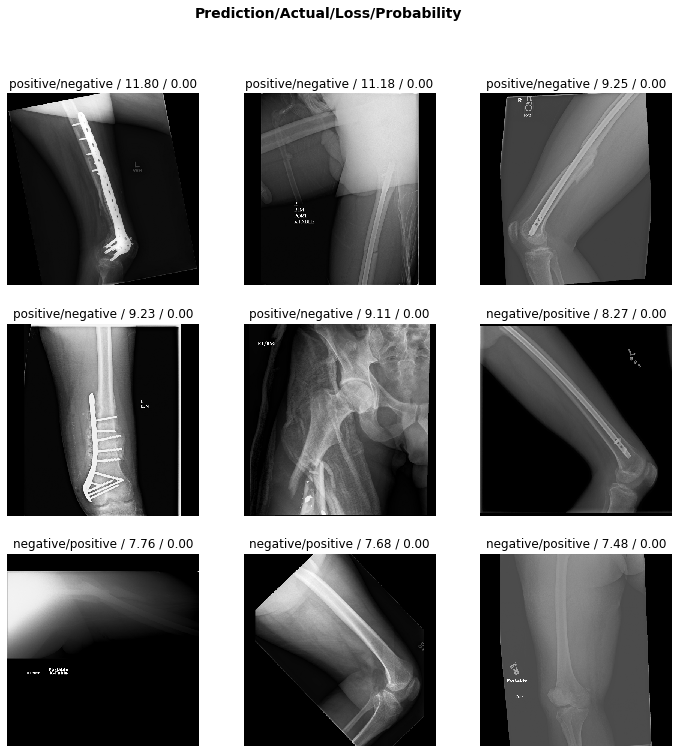

In [13]:
interp.plot_top_losses(k=9)

In [12]:
learn


Learner(data=ImageDataBunch;

Train: LabelList (8212 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: /opt/AIStorage/PLAYGROUND/images/1024;

Valid: LabelList (2062 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
positive,positive,positive,positive,positive
Path: /opt/AIStorage/PLAYGROUND/images/1024;

Test: None, model=DataParallel(
  (module): Sequential(
    (0): Sequential(
      (0): Sequential(
        (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu0): ReLU(inplace=True)
        (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (denseblock1): _DenseBlock(
          (dens